# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Identificar quais fatores influenciam na renda do cliente, sendo considerado cliente as pessoas com cadastro no banco de dados. Os fatores que serão analisados estarão na ficha cadastral do cliente e serão apresentados na sequência.

## Etapa 2 Crisp-DM: Entendimento dos dados

Os dados que serão analisados foram retirados do banco de dados da empresa e estão em um arquivo CSV, abrangendo um período de 15 meses, sendo de janeiro de 2015 até março de 2016.

### Dicionário de dados

| Variável                | Descrição                                                         | Tipo         |
| ----------------------- |:-----------------------------------------------------------------:| ------------:|
| data_ref                | Data de cadastro do cliente                                       | Object       |
| id_cliente              | Número de registro do cliente (ÚNICO)                             | Int          |
| sexo                    | Sexo                                                              | Object       |
| posse_de_veiculo        | Possui veículo?                                                   | Bool         |
| posse_de_imovel         | Possui imóvel?                                                    | Bool         |
| qtd_filhos              | Quantidade de filhos                                              | Int          |
| tipo_renda              | Fonte de renda                                                    | Object       |
| educacao                | Educação formal (Escolaridade)                                    | Object       |
| estado_civil            | Estado civil                                                      | Object       |
| tipo_residencia         | Tipo de residência                                                | Object       |
| idade                   | Idade (Anos)                                                      | Int          |
| tempo_emprego           | Tempo em que o cliente está empregado (Anos)                      | Float        |
| qt_pessoas_residencia   | Quantidade de pessoas que moram na mesma residência que o cliente | Float        |
| renda                   | Renda                                                             | Float        |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

from ydata_profiling import ProfileReport

from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [3]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|          | 0/15 [00:00<?, ?it/s]
%|▋         | 1/15 [00:00<00:01,  7.10it/s]
100%|██████████| 15/15 [00:00<00:00, 47.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [5]:
renda.drop(columns=['Unnamed: 0', 'id_cliente'], inplace=True)
renda.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [6]:
renda.dropna(inplace=True)
renda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               12427 non-null  object 
 1   sexo                   12427 non-null  object 
 2   posse_de_veiculo       12427 non-null  bool   
 3   posse_de_imovel        12427 non-null  bool   
 4   qtd_filhos             12427 non-null  int64  
 5   tipo_renda             12427 non-null  object 
 6   educacao               12427 non-null  object 
 7   estado_civil           12427 non-null  object 
 8   tipo_residencia        12427 non-null  object 
 9   idade                  12427 non-null  int64  
 10  tempo_emprego          12427 non-null  float64
 11  qt_pessoas_residencia  12427 non-null  float64
 12  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.2+ MB


Antes de prosseguir para a análise dos dados, foram removidas as colunas que não fariam sentido para a análise, assim como também as linhas que possuiam dados faltantes.

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [7]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|          | 0/13 [00:00<?, ?it/s]
100%|██████████| 13/13 [00:00<00:00, 61.94it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Removendo as linhas com dados faltantes, foi reduzido o percentual da qtd de filhos, que antes estava a quase 70% para 63,5%.
Tanto com a base completa, quanto com a tratada, a variável renda apresenta característica de decrescimento logarítmico. Para melhor análise da distribuição será apresentado um histograma com função log.

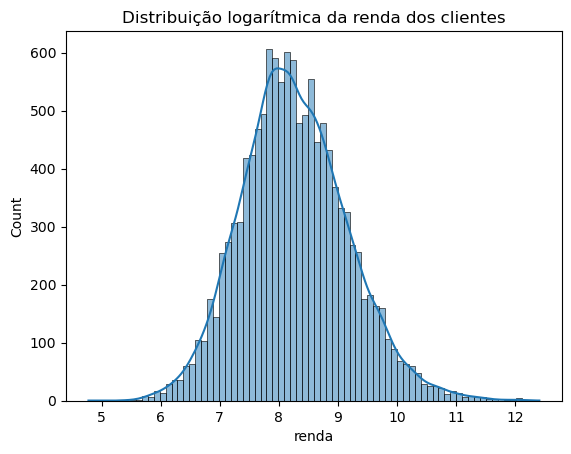

In [9]:
sns.histplot(data=renda, 
             x=np.log(renda['renda']),
             kde=True
             )
plt.title('Distribuição logarítmica da renda dos clientes')
plt.show()

### Entendimento dos dados - Bivariadas




In [10]:
renda_dummies = pd.get_dummies(renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

In [11]:
renda_dummies.drop(columns=['data_ref'], inplace=True)
renda_dummies.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,tipo_renda_Assalariado,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
posse_de_veiculo,1.000000,0.011342,0.085103,-0.109198,-0.076155,0.131266,0.083105,-0.337629,0.337629,0.007649,...,-0.093790,-0.076528,-0.061216,-0.060622,0.010056,-0.021560,0.013183,0.022464,0.036188,-0.011244
posse_de_imovel,0.011342,1.000000,0.007266,0.094254,0.009465,0.003925,0.015367,0.041071,-0.041071,-0.003844,...,-0.030479,0.014496,-0.026072,0.031189,-0.027391,0.192272,-0.153161,-0.013694,-0.017423,-0.117041
qtd_filhos,0.085103,0.007266,1.000000,-0.279069,-0.063220,0.902509,0.002192,-0.080054,0.080054,0.032233,...,-0.017828,-0.137948,-0.006728,-0.073803,-0.016034,0.004599,0.022076,-0.011188,0.011194,-0.027238
idade,-0.109198,0.094254,-0.279069,1.000000,0.321573,-0.253526,0.127069,0.147360,-0.147360,0.028355,...,0.081533,-0.076878,-0.063239,0.157728,-0.057862,0.115301,-0.163000,0.004648,0.012324,0.039650
tempo_emprego,-0.076155,0.009465,-0.063220,0.321573,1.000000,-0.065670,0.385013,0.132896,-0.132896,0.012194,...,0.027112,0.001953,-0.013919,0.031188,-0.044785,0.062624,-0.069504,-0.026384,0.016734,0.013136
qt_pessoas_residencia,0.131266,0.003925,0.902509,-0.253526,-0.065670,1.000000,0.018683,-0.118584,0.118584,0.040491,...,-0.226183,-0.429424,0.056971,-0.199359,-0.029490,0.015195,0.008888,-0.011255,0.012425,-0.020004
renda,0.083105,0.015367,0.002192,0.127069,0.385013,0.018683,1.000000,-0.265325,0.265325,-0.010409,...,-0.011293,-0.028065,-0.033828,-0.022990,-0.000717,0.014470,-0.028878,-0.013116,0.028391,0.005098
sexo_F,-0.337629,0.041071,-0.080054,0.147360,0.132896,-0.118584,-0.265325,1.000000,-1.000000,-0.063213,...,0.078592,0.035482,0.039856,0.118588,-0.057406,0.057462,-0.046165,0.003059,-0.048978,0.018061
sexo_M,0.337629,-0.041071,0.080054,-0.147360,-0.132896,0.118584,0.265325,-1.000000,1.000000,0.063213,...,-0.078592,-0.035482,-0.039856,-0.118588,0.057406,-0.057462,0.046165,-0.003059,0.048978,-0.018061
tipo_renda_Assalariado,0.007649,-0.003844,0.032233,0.028355,0.012194,0.040491,-0.010409,-0.063213,0.063213,1.000000,...,0.006351,-0.046998,-0.023029,0.011402,-0.000554,-0.016494,0.028474,0.015449,-0.038562,0.003823


In [12]:
renda_dummies_abs = renda_dummies.corr()["renda"].abs().sort_values(ascending=False)

print("Correlação das variáveis com renda:")
print(renda_dummies_abs)

Correlação das variáveis com renda:
renda                            1.000000
tempo_emprego                    0.385013
sexo_M                           0.265325
sexo_F                           0.265325
idade                            0.127069
posse_de_veiculo                 0.083105
estado_civil_Casado              0.054248
tipo_renda_Servidor público      0.042051
estado_civil_União               0.033828
educacao_Superior incompleto     0.029545
tipo_residencia_Com os pais      0.028878
tipo_residencia_Estúdio          0.028391
estado_civil_Solteiro            0.028065
estado_civil_Viúvo               0.022990
educacao_Superior completo       0.018961
qt_pessoas_residencia            0.018683
tipo_renda_Empresário            0.016260
posse_de_imovel                  0.015367
tipo_residencia_Casa             0.014470
tipo_residencia_Comunitário      0.013116
estado_civil_Separado            0.011293
educacao_Pós graduação           0.011118
educacao_Primário                0.01049

In [13]:
top5_corr = renda_dummies_abs.drop("renda").head(5)

print("Top 5 variáveis mais correlacionadas com a renda:")
top5_corr

Top 5 variáveis mais correlacionadas com a renda:


tempo_emprego       0.385013
sexo_M              0.265325
sexo_F              0.265325
idade               0.127069
posse_de_veiculo    0.083105
Name: renda, dtype: float64

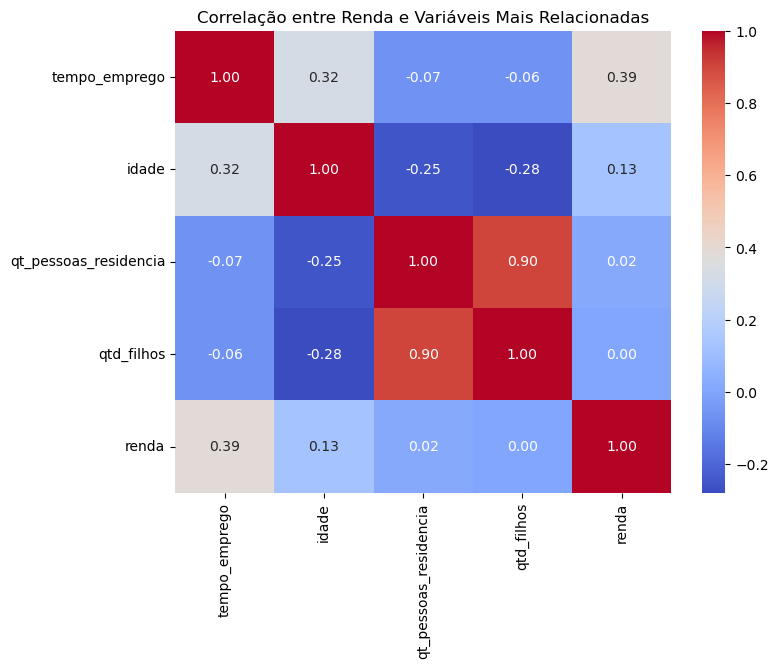

In [14]:
corr = renda_dummies.select_dtypes(include='number').corr()

renda_corr = corr['renda'].drop('renda')
top5_features = renda_corr.abs().sort_values(ascending=False).head(5).index

sub_corr = corr.loc[top5_features.tolist() + ['renda'], top5_features.tolist() + ['renda']]

plt.figure(figsize=(8, 6))
sns.heatmap(sub_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre Renda e Variáveis Mais Relacionadas")
plt.show()

Dentre as variáveis, a com melhor correlação é "Tempo de Emprego" com 39%.

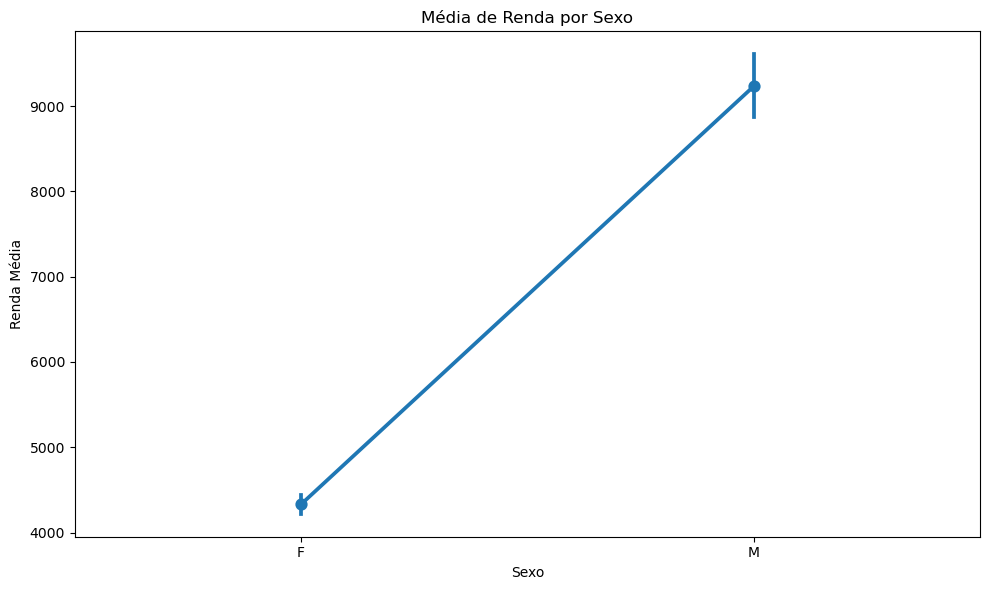

In [15]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=renda, x='sexo', y='renda', dodge=True)

plt.title('Média de Renda por Sexo')
plt.ylabel('Renda Média')
plt.xlabel('Sexo')
plt.tight_layout()
plt.show()

Existe uma considerável diferença na renda média entre os sexos.

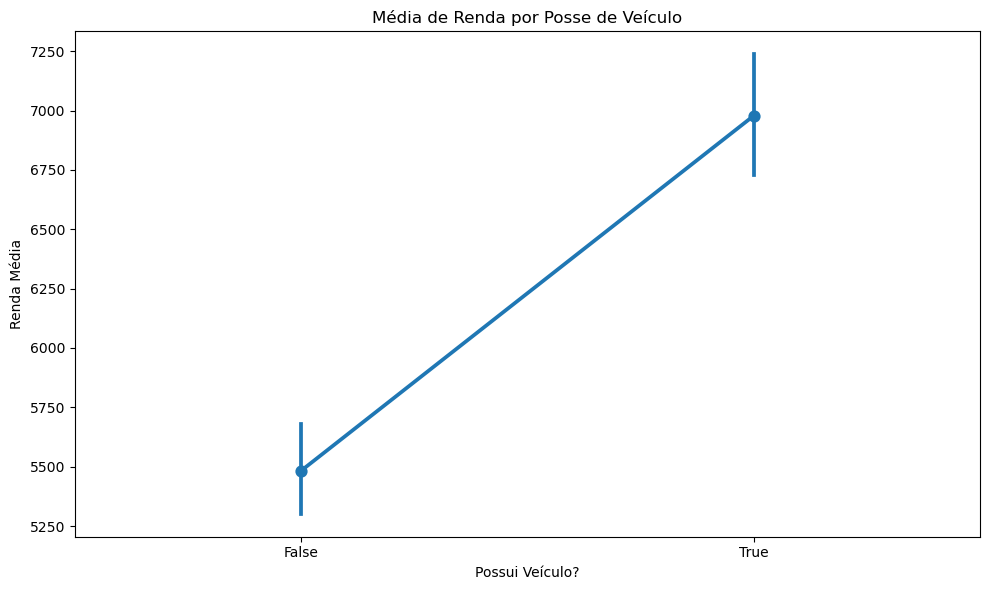

In [16]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=renda, x='posse_de_veiculo', y='renda', dodge=True)

plt.title('Média de Renda por Posse de Veículo')
plt.ylabel('Renda Média')
plt.xlabel('Possui Veículo?')
plt.tight_layout()
plt.show()

Também existe uma diferença para ser levado em conta na média em relação à posse de veículo.

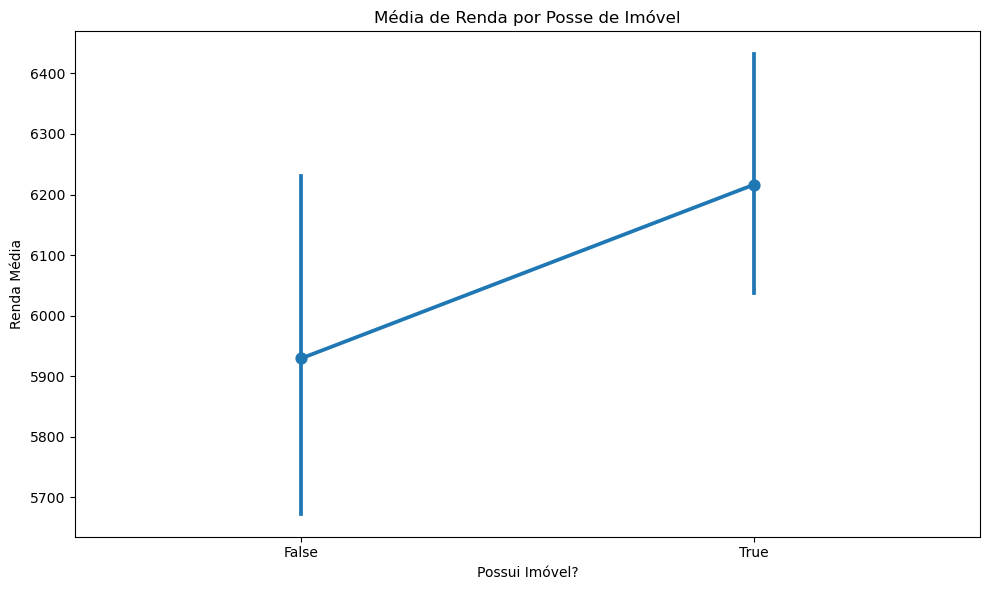

In [17]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=renda, x='posse_de_imovel', y='renda', dodge=True)

plt.title('Média de Renda por Posse de Imóvel')
plt.ylabel('Renda Média')
plt.xlabel('Possui Imóvel?')
plt.tight_layout()
plt.show()

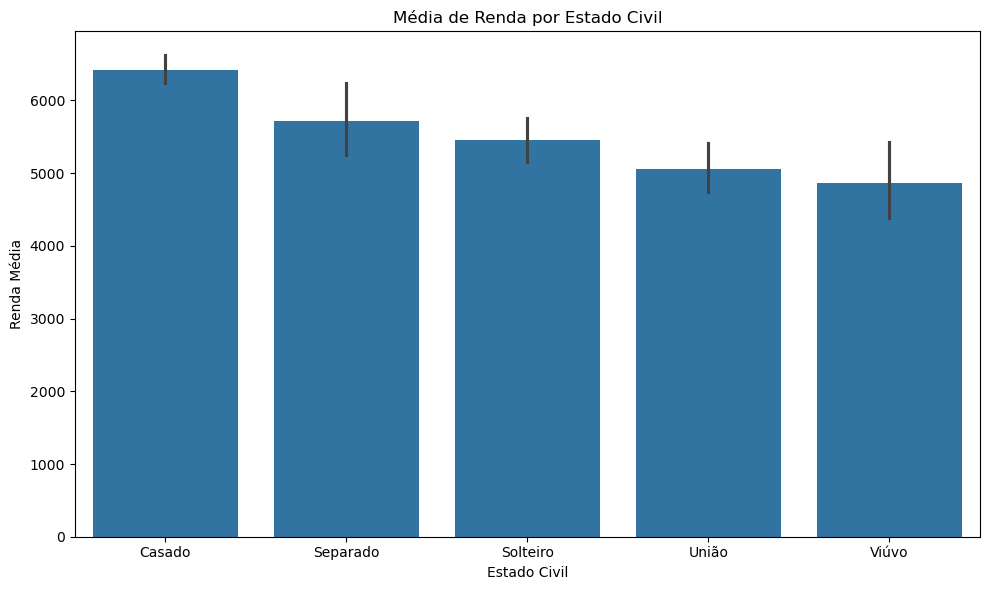

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=renda, x='estado_civil', y='renda', order=renda.groupby('estado_civil')['renda'].mean().sort_values(ascending=False).index, dodge=True)

plt.title('Média de Renda por Estado Civil')
plt.ylabel('Renda Média')
plt.xlabel('Estado Civil')
plt.tight_layout()
plt.show()

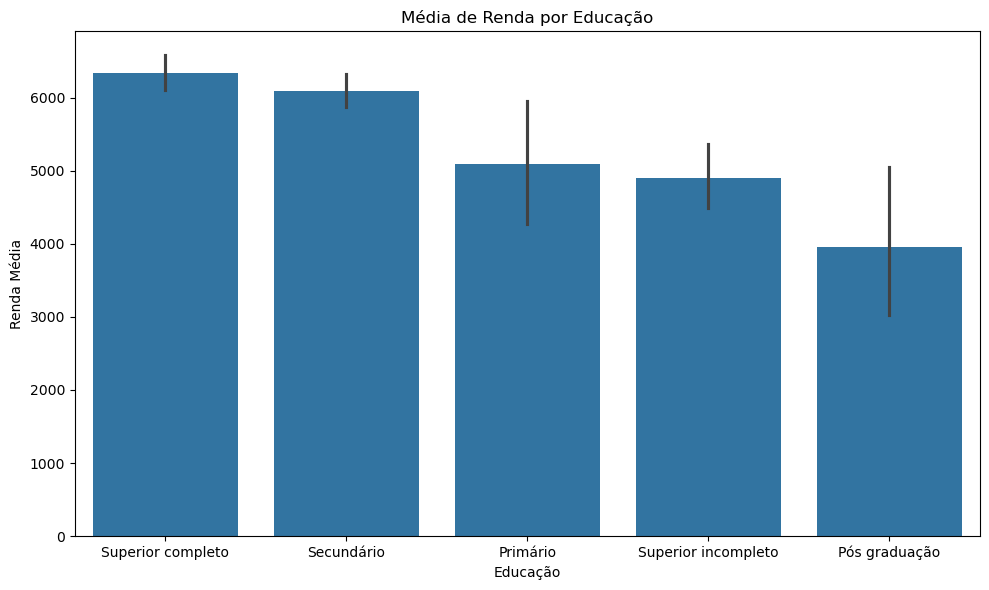

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=renda, x='educacao', y='renda', order=renda.groupby('educacao')['renda'].mean().sort_values(ascending=False).index, dodge=True)

plt.title('Média de Renda por Educação')
plt.ylabel('Renda Média')
plt.xlabel('Educação')
plt.tight_layout()
plt.show()

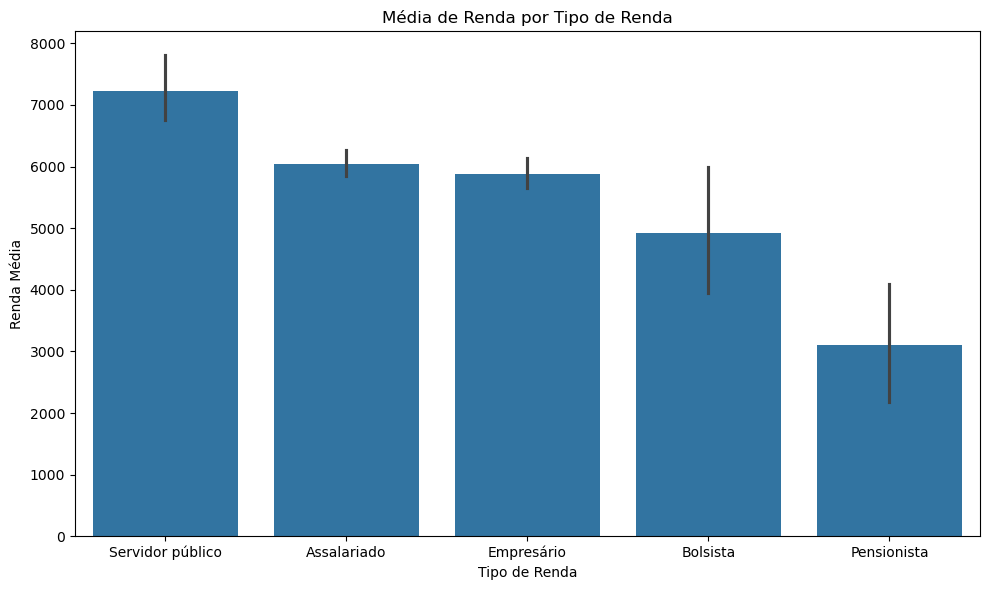

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=renda, x='tipo_renda', y='renda', order=renda.groupby('tipo_renda')['renda'].mean().sort_values(ascending=False).index, dodge=True)

plt.title('Média de Renda por Tipo de Renda')
plt.ylabel('Renda Média')
plt.xlabel('Tipo de Renda')
plt.tight_layout()
plt.show()

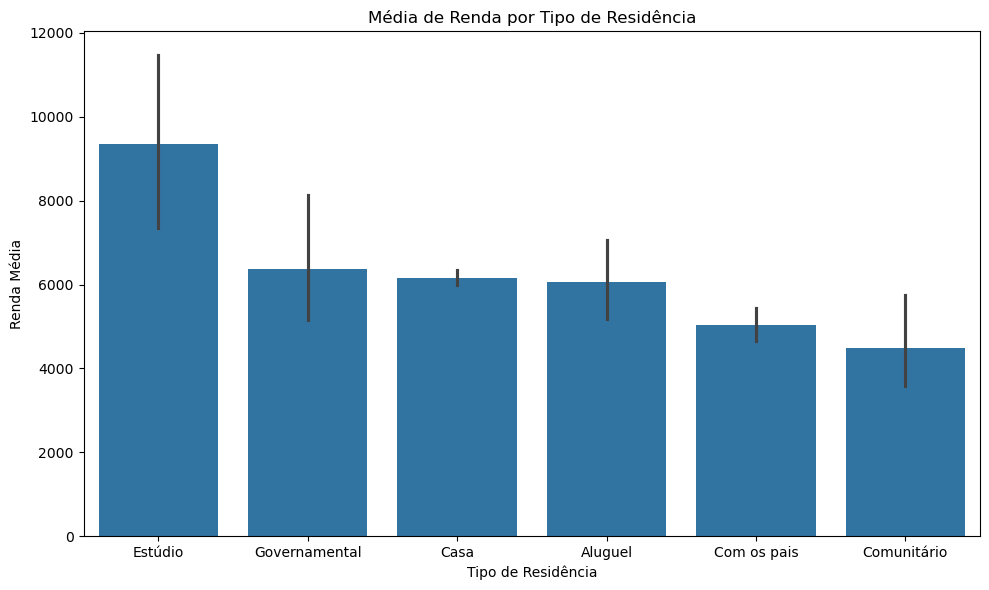

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=renda, x='tipo_residencia', y='renda', order=renda.groupby('tipo_residencia')['renda'].mean().sort_values(ascending=False).index, dodge=True)

plt.title('Média de Renda por Tipo de Residência')
plt.ylabel('Renda Média')
plt.xlabel('Tipo de Residência')
plt.tight_layout()
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



**Seleção:** Anteriormente foi analisado e feito a seleção dos dados, e foram removidas as colunas de "Unnamed: 0", "id_cliente" e "data_ref".

**Limpeza:** Da mesma forma, foram removidos os dados faltantes. A opção escolhida foi remover a linha onde houvesse algum dado faltante. A base que possui 15.000 linhas foi reduzida para 12.427.

**Construção:** Foram criados dummies para analisar as correlações entre as vaiáveis e demais tratamentos futuros.

In [22]:
X, y = renda_dummies.drop('renda', axis=1), renda_dummies['renda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [23]:
X

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_F,sexo_M,tipo_renda_Assalariado,tipo_renda_Bolsista,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,False,True,0,26,6.602740,1.0,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
1,True,True,0,28,7.183562,2.0,False,True,True,False,...,False,False,False,False,False,True,False,False,False,False
2,True,True,0,35,0.838356,2.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,True,1,30,4.846575,3.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,True,False,0,33,4.293151,1.0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,True,False,0,32,9.849315,2.0,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
14995,False,True,0,48,13.887671,1.0,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
14997,True,True,0,45,7.832877,2.0,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
14998,True,False,0,36,4.298630,2.0,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [24]:
y

0        8060.34
1        1852.15
2        2253.89
3        6600.77
4        6475.97
          ...   
14994    1592.57
14995    7990.58
14997     604.82
14998    3352.27
14999    1160.99
Name: renda, Length: 12427, dtype: float64

In [25]:
tree = DecisionTreeRegressor(random_state=42)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 53452486.66715276
R²: 0.16744293499297036


In [26]:
alphas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
resultados = []

for alpha in alphas:
    modelo = Lasso(alpha=alpha)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    resultados.append((alpha, mse, r2))

for r in resultados:
    print(f"Alpha: {r[0]:>5} | MSE: {r[1]:.2f} | R²: {r[2]:.4f}")

C:\Users\Kelvi Orloviki\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.329e+11, tolerance: 7.425e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Kelvi Orloviki\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.237e+10, tolerance: 7.425e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Kelvi Orloviki\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Alpha:  0.01 | MSE: 46892660.72 | R²: 0.2696
Alpha:  0.05 | MSE: 46891849.76 | R²: 0.2696
Alpha:   0.1 | MSE: 46891397.66 | R²: 0.2696
Alpha:   0.5 | MSE: 46885985.62 | R²: 0.2697
Alpha:     1 | MSE: 46880393.77 | R²: 0.2698
Alpha:     5 | MSE: 46857838.48 | R²: 0.2702
Alpha:    10 | MSE: 46861816.37 | R²: 0.2701


O melhor valor para alfa é 5, possui o maior R² e menor MSE.

In [27]:
modelo_final = Lasso(alpha=5)
modelo_final.fit(X_train, y_train)

y_pred_final = modelo_final.predict(X_test)

mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print("Modelo final (alpha=5)")
print("MSE:", round(mse_final, 2))
print("R²:", round(r2_final, 4))

Modelo final (alpha=5)
MSE: 46857838.48
R²: 0.2702


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


O modelo escolhido foi Regressão Lasso (L1) — uma forma de regressão linear que aplica penalização L1, reduzindo coeficientes de variáveis menos importantes a zero. É útil para seleção automática de variáveis, reduz overfitting e melhora interpretabilidade.
O motivo da escolha foi pelos dados possuirem muitas variáveis após transformação em dummies, e o Lasso ajuda a reduzir complexidade do modelo, e teve boa performance nos testes comparativos com outros alphas.

As alternativas consideradas foram: Regressão Linear Padrão, Árvore de Regressão e Ridge (L2).

Para o desenho do teste foi utilizado train_test_split do sklearn com proporção de 70/30 (treino e teste), shuffle para garantir aleatoriedade. Random State 42 para garantir reprodutibilidade.

Como métrica de avaliação foi usado o MSE (Erro Quadrático Médio) e R² (Coeficiente de determinação).

O melhor modelo foi Lasso com alpha = 5

### Rodando o modelo


In [28]:
print("MSE:", round(mse_final, 2))
print("R²:", round(r2_final, 4))

MSE: 46857838.48
R²: 0.2702


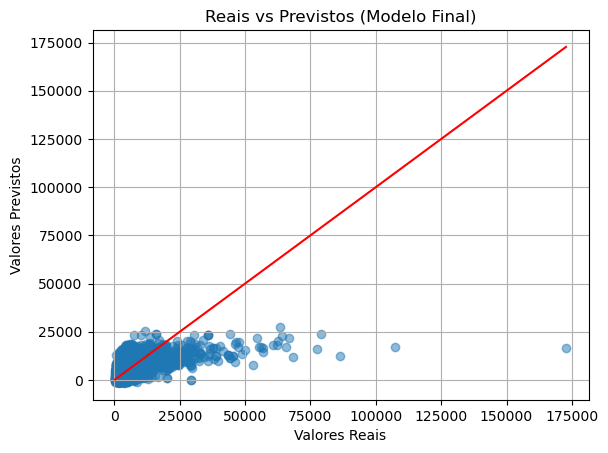

In [29]:
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Reais vs Previstos (Modelo Final)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()

Esse modelo está razoável. Se mostra como bom indicador preditivo para faixa de renda de até 25.000. Mas acima desse valor, o valor real começa a se distanciar e aumenta progressivamente, ficando bem distante o valor previsto do real.

Será testado um novo modelo na base log.

Modelo com Renda Original:
  R²: 0.2702
  MSE: 46857838.48

Modelo com Log da Renda:
  R²: -0.0649
  MSE: 68370699.73


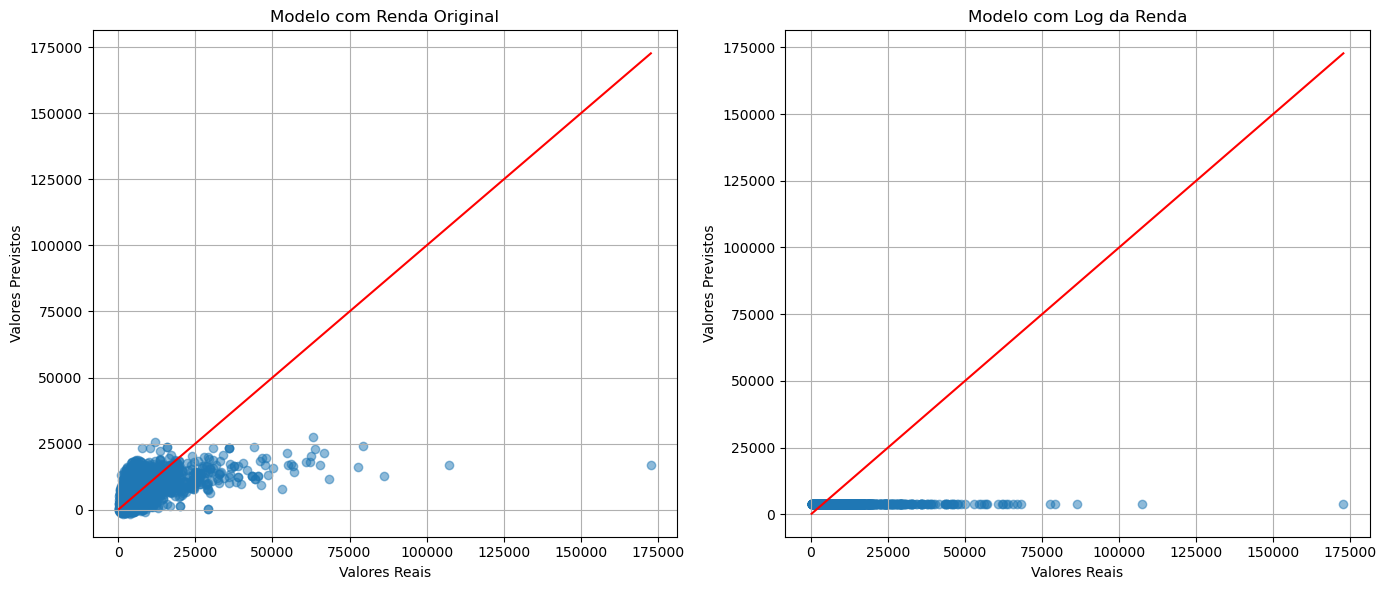

In [30]:
renda_dummies['log_renda'] = np.log1p(renda_dummies['renda'])

X = renda_dummies.drop(['renda', 'log_renda'], axis=1)

# Divisão (usando a mesma aleatoriedade)
X_train, X_test, y_train_renda, y_test_renda = train_test_split(
    X, renda_dummies['renda'], test_size=0.3, random_state=42, shuffle=True
)

# Modelo com Renda original
modelo_renda = Lasso(alpha=5)
modelo_renda.fit(X_train, y_train_renda)
y_pred_renda = modelo_renda.predict(X_test)

r2_renda = r2_score(y_test_renda, y_pred_renda)
mse_renda = mean_squared_error(y_test_renda, y_pred_renda)

# Modelo com Log da Renda
y_train_log = renda_dummies.loc[X_train.index, 'log_renda']
y_test_log = renda_dummies.loc[X_test.index, 'log_renda']

modelo_log = Lasso(alpha=5)
modelo_log.fit(X_train, y_train_log)
y_pred_log = modelo_log.predict(X_test)

# Reverter o log
y_pred_log_exp = np.expm1(y_pred_log)
y_test_log_exp = np.expm1(y_test_log)

r2_log = r2_score(y_test_log_exp, y_pred_log_exp)
mse_log = mean_squared_error(y_test_log_exp, y_pred_log_exp)

# Mostrar as métricas comparativas
print("Modelo com Renda Original:")
print(f"  R²: {r2_renda:.4f}")
print(f"  MSE: {mse_renda:.2f}")

print("\nModelo com Log da Renda:")
print(f"  R²: {r2_log:.4f}")
print(f"  MSE: {mse_log:.2f}")

# Gráfico comparativo
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_renda, y_pred_renda, alpha=0.5)
plt.plot([y_test_renda.min(), y_test_renda.max()],
         [y_test_renda.min(), y_test_renda.max()], 'r')
plt.title("Modelo com Renda Original")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test_log_exp, y_pred_log_exp, alpha=0.5)
plt.plot([y_test_log_exp.min(), y_test_log_exp.max()],
         [y_test_log_exp.min(), y_test_log_exp.max()], 'r')
plt.title("Modelo com Log da Renda")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.grid(True)

plt.tight_layout()
plt.show()

O primeiro modelo apresenta melhores resultados. Vamos descartar essa alteração. Será testado um novo modelo usando Random Forest.

Modelo Random Forest com Renda Original:
  R²: 0.4196
  MSE: 37260892.76

Modelo Random Forest com Log da Renda:
  R²: 0.4274
  MSE: 36760715.74


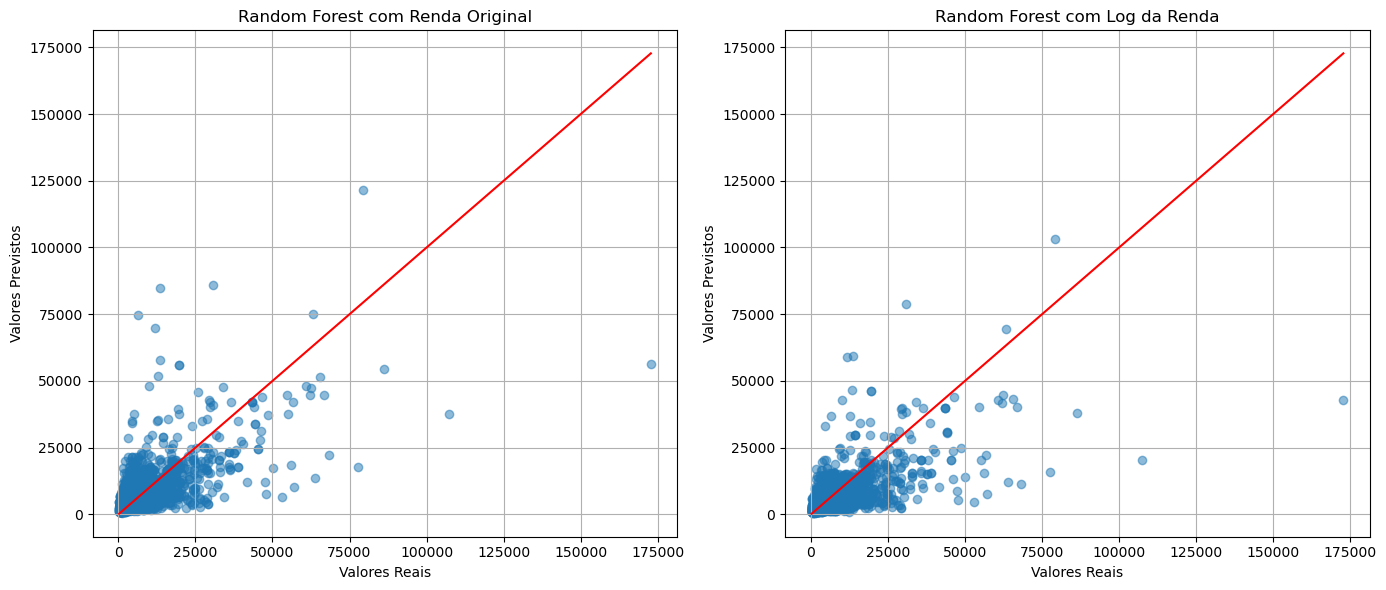

In [31]:
# Separar novamente X e y
X = renda_dummies.drop(['renda', 'log_renda'], axis=1)

# Divisão de treino e teste (mantendo a mesma aleatoriedade)
X_train, X_test, y_train_renda, y_test_renda = train_test_split(
    X, renda_dummies['renda'], test_size=0.3, random_state=42, shuffle=True
)

# 2. Modelo Random Forest com Renda Original
rf_renda = RandomForestRegressor(n_estimators=100, random_state=42)
rf_renda.fit(X_train, y_train_renda)
y_pred_rf_renda = rf_renda.predict(X_test)

r2_rf_renda = r2_score(y_test_renda, y_pred_rf_renda)
mse_rf_renda = mean_squared_error(y_test_renda, y_pred_rf_renda)

# 3. Modelo Random Forest com Log da Renda
y_train_log = renda_dummies.loc[X_train.index, 'log_renda']
y_test_log = renda_dummies.loc[X_test.index, 'log_renda']

rf_log = RandomForestRegressor(n_estimators=100, random_state=42)
rf_log.fit(X_train, y_train_log)
y_pred_rf_log = rf_log.predict(X_test)

# Reverter o log
y_pred_rf_log_exp = np.expm1(y_pred_rf_log)
y_test_log_exp = np.expm1(y_test_log)

r2_rf_log = r2_score(y_test_log_exp, y_pred_rf_log_exp)
mse_rf_log = mean_squared_error(y_test_log_exp, y_pred_rf_log_exp)

# 4. Exibir as métricas comparativas
print("Modelo Random Forest com Renda Original:")
print(f"  R²: {r2_rf_renda:.4f}")
print(f"  MSE: {mse_rf_renda:.2f}")

print("\nModelo Random Forest com Log da Renda:")
print(f"  R²: {r2_rf_log:.4f}")
print(f"  MSE: {mse_rf_log:.2f}")

# 5. Gráfico comparativo
plt.figure(figsize=(14, 6))

# Gráfico do Random Forest com Renda Original
plt.subplot(1, 2, 1)
plt.scatter(y_test_renda, y_pred_rf_renda, alpha=0.5)
plt.plot([y_test_renda.min(), y_test_renda.max()],
         [y_test_renda.min(), y_test_renda.max()], 'r')
plt.title("Random Forest com Renda Original")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.grid(True)

# Gráfico do Random Forest com Log da Renda
plt.subplot(1, 2, 2)
plt.scatter(y_test_log_exp, y_pred_rf_log_exp, alpha=0.5)
plt.plot([y_test_log_exp.min(), y_test_log_exp.max()],
         [y_test_log_exp.min(), y_test_log_exp.max()], 'r')
plt.title("Random Forest com Log da Renda")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.grid(True)

plt.tight_layout()
plt.show()

O modelo usando Random Forest se mostrou melhor, sendo o com log ligeiramente superior ao de renda original.

## Etapa 5 Crisp-DM: Avaliação dos resultados


O modelo Random Forest com log da renda apresentou um R² de 0.4274 no conjunto de teste, indicando que explica cerca de 43% da variação da renda. O MSE foi de 36760715.74, sugerindo que o erro médio das previsões está dentro de um intervalo razoável para a maioria dos casos. A análise do gráfico de dispersão mostra uma boa aproximação para a faixa de renda até R$ 20.000, com maior dispersão acima disso, o que era esperado dado o comportamento assimétrico dos dados.

In [32]:
modelo_rf_log = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf_log.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

R²: 0.4274
MSE: 36760715.74
RMSE: 6063.06
MAE: 2882.82


C:\Users\Kelvi Orloviki\AppData\Local\Temp\ipykernel_9140\2437635322.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancias_df, y='Variável', x='Importância', palette='viridis')


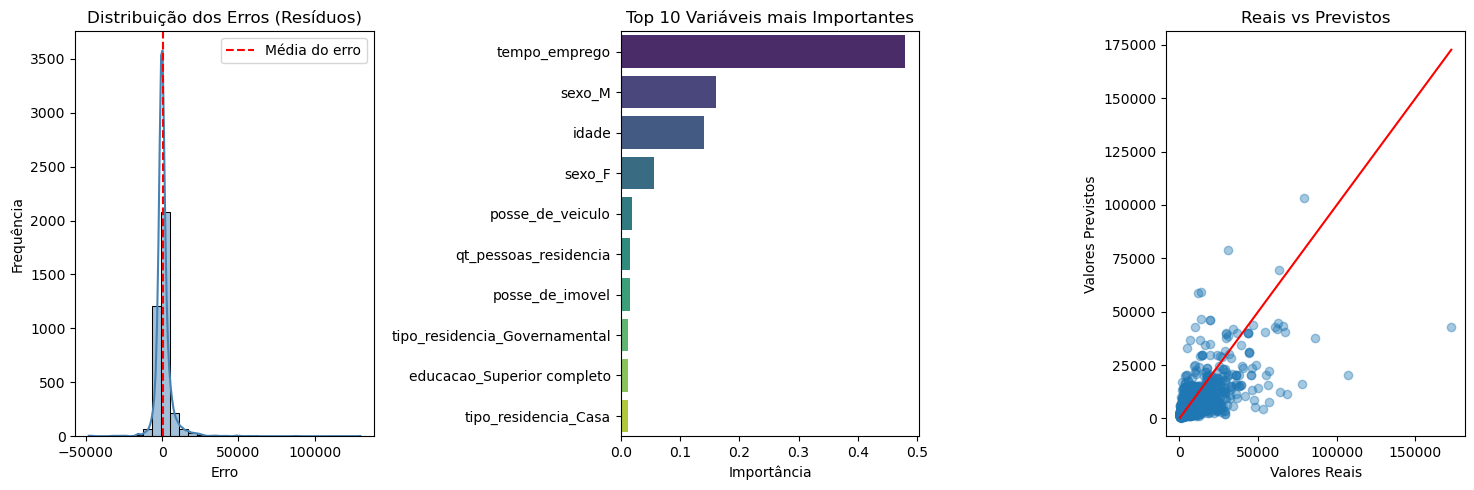

In [33]:
y_pred_log_rf = rf_log.predict(X_test)

# Corrigido a partir daqui
# A predição ainda está no log, precisa desfazer:
y_pred_rf_log = np.expm1(y_pred_log_rf)  

# O y_test já é renda normal, então NÃO desfaz nada
y_test_real = y_test

# Avaliação de métricas
mse = mean_squared_error(y_test_real, y_pred_rf_log)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_real, y_pred_rf_log)
r2 = r2_score(y_test_real, y_pred_rf_log)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Distribuição dos erros

erros = y_test_real - y_pred_rf_log
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(erros, kde=True, bins=30, color='steelblue')
plt.title("Distribuição dos Erros (Resíduos)")
plt.xlabel("Erro")
plt.ylabel("Frequência")
plt.axvline(erros.mean(), color='red', linestyle='--', label='Média do erro')
plt.legend()

# Importância das variáveis
importances = modelo_rf_log.feature_importances_
features = X.columns
importancias_df = pd.DataFrame({'Variável': features, 'Importância': importances})
importancias_df = importancias_df.sort_values(by='Importância', ascending=False).head(10)

plt.subplot(1, 3, 2)
sns.barplot(data=importancias_df, y='Variável', x='Importância', palette='viridis')
plt.title("Top 10 Variáveis mais Importantes")
plt.xlabel("Importância")
plt.ylabel("")

# Reais vs Previstos
plt.subplot(1, 3, 3)
plt.scatter(y_test_real, y_pred_rf_log, alpha=0.4)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], color='red')
plt.title("Reais vs Previstos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")

plt.tight_layout()
plt.show()

O modelo Random Forest com transformação logarítmica na variável alvo apresentou desempenho satisfatório na previsão da renda, com um R² de 0,4274. Isso significa que o modelo é capaz de explicar cerca de 42,7% da variabilidade dos dados de renda, o que é um bom indicativo considerando a complexidade e a variabilidade natural dessa variável em populações reais.

As métricas de erro indicam que o modelo tem um desvio médio de aproximadamente R$2.883 (MAE) entre as previsões e os valores reais, com um desvio quadrático médio (RMSE) de cerca de R$6.063. Esses valores sugerem um modelo relativamente preciso, especialmente para aplicações onde uma estimativa aproximada da renda é suficiente, como em segmentações de mercado ou classificações de perfil socioeconômico.

Embora o desempenho geral seja satisfatório, há margem para melhorias, como ajuste de hiperparâmetros, criação de novas variáveis preditoras ou uso de outras abordagens como empilhamento de modelos. Ainda assim, o modelo atual é robusto, interpretável e útil para os objetivos propostos.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [34]:
def prever_renda_novo_dado(df_novo, modelo_treinado):
    # Preprocessamento
    df = pd.get_dummies(df_novo, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
    df = df.reindex(columns=modelo_treinado.feature_names_in_, fill_value=0)
    
    # Predição e desfazendo o log
    pred_log = modelo_treinado.predict(df)
    pred_renda = np.expm1(pred_log)
    
    return pred_renda

In [35]:
y_pred_log = rf_log.predict(X_test)

# Desfazer o log (exponencial inverso)
y_pred = np.expm1(y_pred_log)  # desfazendo o np.log1p usado anteriormente
y_real = np.expm1(y_test)

# Criar DataFrame com os resultados
df_resultados = pd.DataFrame({
    'Renda_Real': y_real,
    'Renda_Prevista': y_pred,
    'Erro_Absoluto': abs(y_real - y_pred),
    'Erro_Porcentual': abs(y_real - y_pred) / y_real * 100
})

df_resultados.head()

C:\Users\Kelvi Orloviki\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Renda_Real,Renda_Prevista,Erro_Absoluto,Erro_Porcentual
14812,inf,2154.399434,inf,NaN
11591,inf,3084.807972,inf,NaN
13436,inf,1283.600634,inf,NaN
14948,inf,3882.628211,inf,NaN
14509,inf,1387.447396,inf,NaN


In [36]:
def prever_renda(df: pd.DataFrame):
    renda_prevista = list(tree.predict(df))
    df_renda = []
    for i in renda_prevista:
        if i <= 2500:
            dic = {'renda_prevista': i, 'limite_de_credito': 3000, 'classe_cartao': 'standard', 'emprestimo_concedido': 18000}
            df_renda.append(dic)
        elif i <= 5000:
            dic = {'renda_prevista': i, 'limite_de_credito': 6000, 'classe_cartao': 'gold', 'emprestimo_concedido': 36000}
            df_renda.append(dic)
        elif i <= 7500:
            dic = {'renda_prevista': i, 'limite_de_credito': 8500, 'classe_cartao': 'platinum', 'emprestimo_concedido': 54000}
            df_renda.append(dic)
        elif i <= 10000:
            dic = {'renda_prevista': i, 'limite_de_credito': 15000, 'classe_cartao': 'black', 'emprestimo_concedido': 72000}
            df_renda.append(dic)
        elif i <= 15000:
            dic = {'renda_prevista': i, 'limite_de_credito': 20000, 'classe_cartao': 'black', 'emprestimo_concedido': 100000}
            df_renda.append(dic)
        elif i > 15000:
            dic = {'renda_prevista': i, 'limite_de_credito': 'ilimitado', 'classe_cartao': 'black', 'emprestimo_concedido': 150000}
            df_renda.append(dic)
        
    df_renda = pd.DataFrame(df_renda)
    return df_renda.sample(15)

In [37]:
prever_renda(X_test)

,renda_prevista,limite_de_credito,classe_cartao,emprestimo_concedido
621,18512.776000,ilimitado,black,150000
3663,1486.720000,3000,standard,18000
696,943.330000,3000,standard,18000
2119,1383.810000,3000,standard,18000
2722,5190.955000,8500,platinum,54000
2067,4936.392500,6000,gold,36000
1002,3184.530000,6000,gold,36000
241,4721.110000,6000,gold,36000
1305,5645.870000,8500,platinum,54000
1413,9133.652500,15000,black,72000


O modelo se mostra como um bom preditor de renda para rendas até 25.000, útil até um pouco mais que isso, mas nao tão preciso. Porém, a maior parte dos dados se encontram agrupados nessa faixa, o que torna o modelo muito útil.